<a href="https://colab.research.google.com/github/Sana-Ahsan06/PlagiarismRemover/blob/master/Data_Analysis_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
# Generate 1000 random dates and times within a specific range
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)
date_times = [start_date + timedelta(seconds=random.randint(0, int((end_date - start_date).total_seconds()))) for _ in range(1000)]
# Generate random customer IDs
customer_ids = ['C' + str(i).zfill(4) for i in range(1, 1001)]
# Generate random product IDs
product_ids = ['P' + str(i).zfill(3) for i in range(1, 101)]
# Generate random quantities sold
quantities_sold = np.random.randint(1, 10, size=1000)
# Generate random unit prices
unit_prices = np.random.uniform(1, 100, size=1000)
# Calculate total transaction amounts
total_transaction_amounts = quantities_sold * unit_prices
# Generate random store IDs
store_ids = ['S' + str(i).zfill(3) for i in range(1, 11)]
# Randomly assign store IDs to transactions
store_ids = [random.choice(store_ids) for _ in range(1000)]
# Create DataFrame
data = {
 'Date & Time': date_times,
 'Customer ID': random.choices(customer_ids, k=1000),
 'Product ID': random.choices(product_ids, k=1000),
 'Quantity Sold': quantities_sold,
 'Unit Price': unit_prices,
 'Total Transaction Amount': total_transaction_amounts,
 'Store ID': store_ids
}
df = pd.DataFrame(data)
# Convert Date & Time column to datetime format
df['Date & Time'] = pd.to_datetime(df['Date & Time'])
# Sort DataFrame by Date & Time
df = df.sort_values(by='Date & Time')
# Reset index
df.reset_index(drop=True, inplace=True)
# Print DataFrame
print(df)


            Date & Time Customer ID Product ID  Quantity Sold  Unit Price  \
0   2023-01-01 01:17:24       C0755       P070              6   66.134591   
1   2023-01-01 01:37:16       C0686       P100              9   71.254351   
2   2023-01-01 08:10:01       C0199       P061              8   81.268469   
3   2023-01-01 18:44:48       C0083       P045              5   34.093811   
4   2023-01-01 19:54:04       C0674       P012              7   18.179997   
..                  ...         ...        ...            ...         ...   
995 2023-12-28 22:35:34       C0009       P050              9   14.952855   
996 2023-12-29 19:46:02       C0144       P090              5   55.211665   
997 2023-12-30 09:31:02       C0371       P039              7    8.453343   
998 2023-12-30 10:40:23       C0557       P004              6   65.921894   
999 2023-12-30 23:07:12       C0660       P034              3   47.752995   

     Total Transaction Amount Store ID  
0                  396.807544     


# **Descriptive Analysis**
> Add blockquote



In [2]:
#Generate descriptive analysis for numerical data
print(df.describe())

                         Date & Time  Quantity Sold   Unit Price  \
count                           1000    1000.000000  1000.000000   
mean   2023-07-03 11:43:02.113999872       4.874000    52.346678   
min              2023-01-01 01:17:24       1.000000     1.166386   
25%       2023-03-31 07:01:02.500000       3.000000    27.545266   
50%       2023-07-05 02:41:23.500000       5.000000    54.208278   
75%              2023-10-02 06:54:59       7.000000    76.721933   
max              2023-12-30 23:07:12       9.000000    99.785587   
std                              NaN       2.583951    28.447409   

       Total Transaction Amount  
count               1000.000000  
mean                 254.289080  
min                    2.677160  
25%                   84.326163  
50%                  196.499422  
75%                  371.435699  
max                  876.675194  
std                  206.859055  


# **Descriptive statistic visualization**

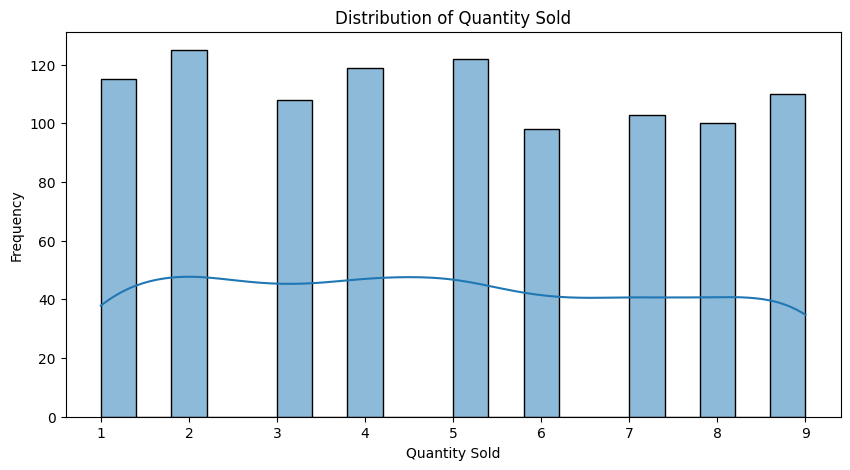

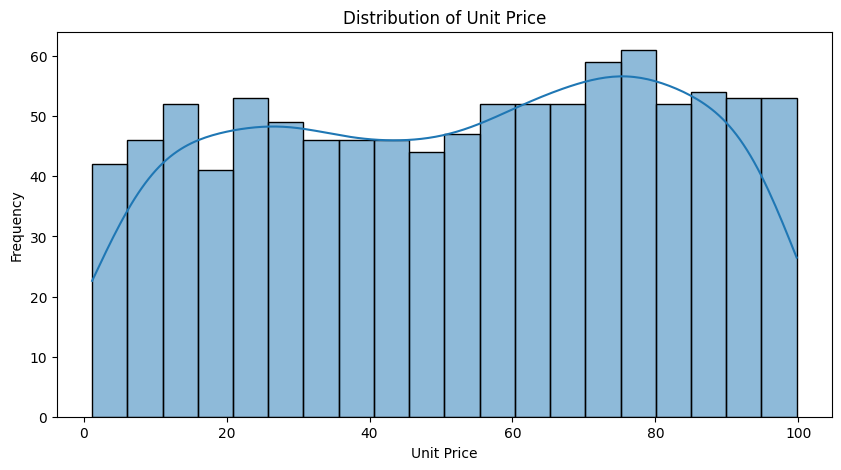

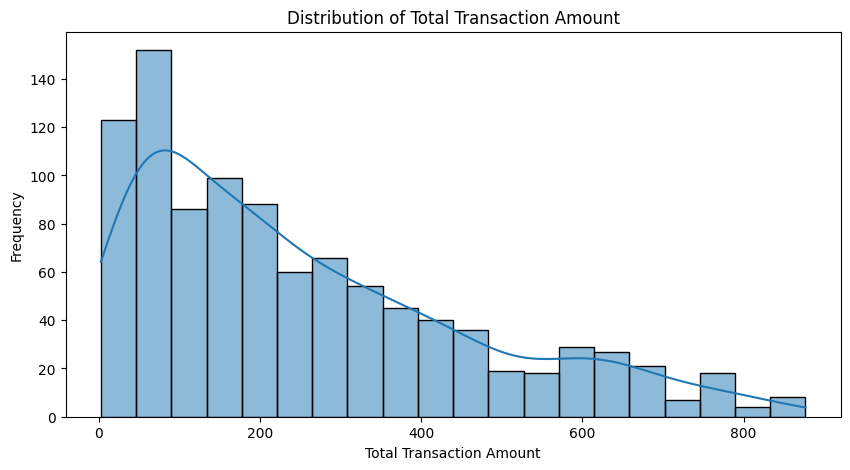

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Descriptive Statistics Visualization:Distribution of quantity sold
plt.figure(figsize=(10, 5))
sns.histplot(df['Quantity Sold'], bins=20, kde=True)
plt.title('Distribution of Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Frequency')
plt.show()

#Descriptive Statistics Visualization:Distribution of unit price
plt.figure(figsize=(10, 5))
sns.histplot(df['Unit Price'], bins=20, kde=True)
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

#Descriptive Statistics Visualization:Distribution of total transaction amount
plt.figure(figsize=(10, 5))
sns.histplot(df['Total Transaction Amount'], bins=20, kde=True)
plt.title('Distribution of Total Transaction Amount')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# **Correlation Analysis**

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Initialize LabelEncoder
label_encoder = LabelEncoder()

#Encode 'Customer ID' and 'Product ID'
df['Customer ID'] = label_encoder.fit_transform(df['Customer ID'])
df['Product ID'] = label_encoder.fit_transform(df['Product ID'])

# Calculate correlation matrix
correlation_matrix = df.corr()

# Print correlation matrix
print(correlation_matrix)



               Date & Time  Customer ID  Product ID  Quantity Sold  Unit Price
Date & Time       1.000000     0.506476    0.673815      -0.426848    0.865821
Customer ID       0.506476     1.000000    0.700000      -0.459573    0.620429
Product ID        0.673815     0.700000    1.000000      -0.853492    0.567071
Quantity Sold    -0.426848    -0.459573   -0.853492       1.000000   -0.491402
Unit Price        0.865821     0.620429    0.567071      -0.491402    1.000000


# **Correlation visualization**

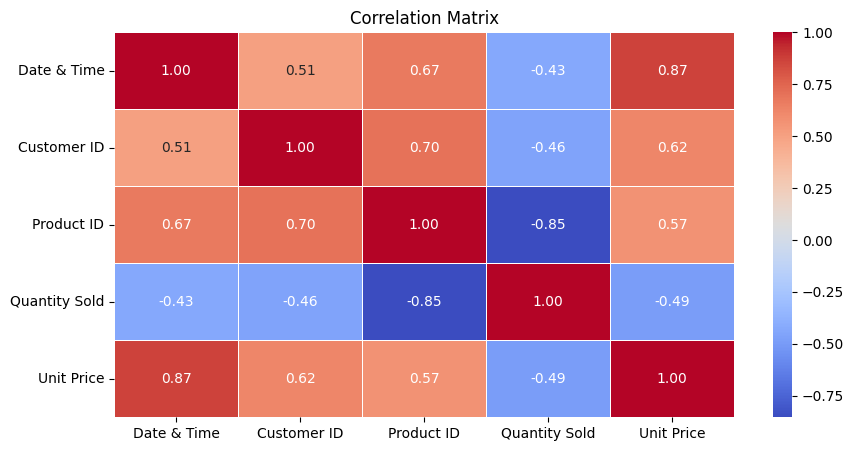

In [ ]:
# Correlation Analysis Visualization
plt.figure(figsize=(10, 5))

#Create a heatmap for visualizing correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

#Set the plot title
plt.title('Correlation Matrix')

#display the plot
plt.show()


# **Hypothesis Analysis**

In [6]:
#import ttest_ind function from scipy.stats

from scipy.stats import ttest_ind

#sales data for store 1 and store 2
store_1_sales = df[df['Store ID'] == 'S001']['Total Transaction Amount']
store_2_sales = df[df['Store ID'] == 'S002']['Total Transaction Amount']

#perform ttest to compare sales between store 1 and store 2
t_stat, p_value = ttest_ind(store_1_sales, store_2_sales)

#print the calculated t test and p vale
print("Hypothesis Testing Results:")
print("T-Statistic:", t_stat)
print("P-Value:", p_value)


Hypothesis Testing Results:
T-Statistic: -0.5087215447432766
P-Value: 0.6114690505576216


# **Hypothesis analysis visualization**

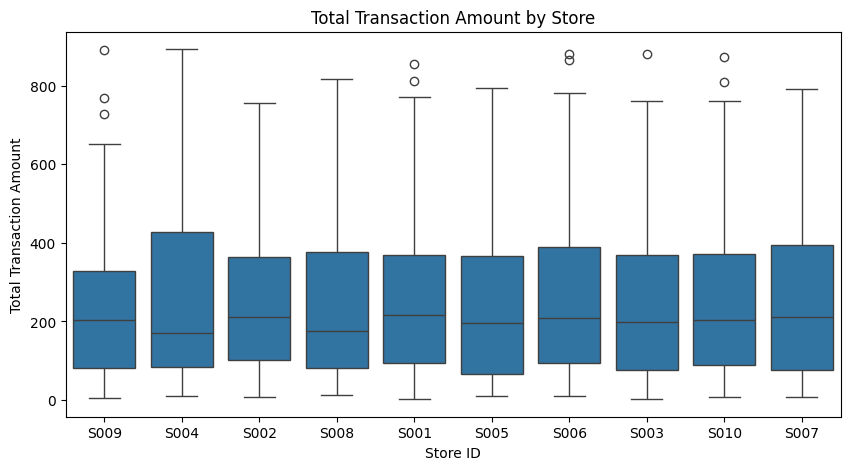

In [ ]:
# Hypothesis Testing Visualization
plt.figure(figsize=(10, 5))

#create a boxplot for distribution of total transaction amount across different store locations
sns.boxplot(x='Store ID', y='Total Transaction Amount', data=df)

#set the plot title and axis label
plt.title('Total Transaction Amount by Store')
plt.xlabel('Store ID')
plt.ylabel('Total Transaction Amount')

#display the plot
plt.show()

# **Time Series Analysis**

In [ ]:
# Time-series analysis
#resample the dataset to aggregate the total transaction amount on monthly basis
#'M' specifies the monthly frequency
#with 'sum()' function we sum the otal transaction amount

monthly_sales = df.resample('M', on='Date & Time')['Total Transaction Amount'].sum()
print(monthly_sales)


Date & Time
2023-01-31    20329.988190
2023-02-28    22362.200045
2023-03-31    20333.347916
2023-04-30    23021.110171
2023-05-31    26974.877909
2023-06-30    26013.040060
2023-07-31    19602.341136
2023-08-31    24569.835883
2023-09-30    16200.748397
2023-10-31    19596.025571
2023-11-30    26484.552352
2023-12-31    20962.883888
Freq: M, Name: Total Transaction Amount, dtype: float64


# **Time series visualization**

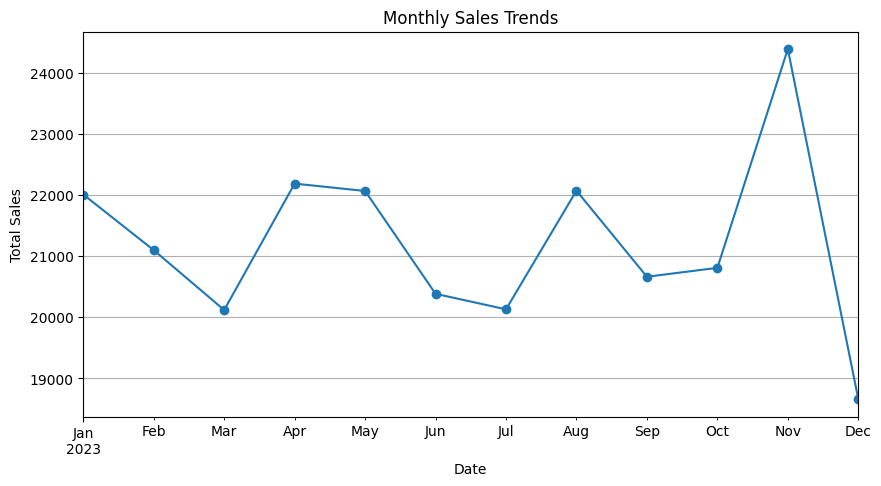

In [ ]:
# Time-Series Analysis Visualization

monthly_sales = df.resample('M', on='Date & Time')['Total Transaction Amount'].sum()
plt.figure(figsize=(10, 5))

#for mothly sales trends create a line plot
monthly_sales.plot(kind='line', marker='o')

#set plot title and axis label
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')

#enable the gridlines
plt.grid(True)

#disply the plot
plt.show()